In [115]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from sklearn import tree
import pandas as pd
from sklearn.metrics import accuracy_score
    
print("Reading Spambase dataset")

X = []
Y = []
X_test = []
Y_test = []
X_train = []
Y_train = []
def read_data():
    data = pd.read_csv('spambase.data', header=None)
    data.rename(columns={57:'is_spam'}, inplace=True)
    with open("spambase.data") as f:
        for i,line in enumerate(f):
            line= line.strip()
            line = line.split(',')
            line2 = [float(i) for i in line]
            X.append(line2[:len(line2)-1])
            Y.append(line2[len(line2)-1:][0]) 

print("Done loading data")
read_data()

Reading Spambase dataset
Done loading data


In [116]:
X_test = X[int(0.9*len(X)):]
Y_test = Y[int(0.9*len(Y)):]
X_train = X[:int(0.9*len(X))]
Y_train = Y[:int(0.9*len(Y))]
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

4140
461
4140
461


In [117]:
def get_score(labels):
    return accuracy_score(Y_test, labels, normalize=True)

In [118]:
def get_accuracy(n):
    print("Number of components: ", n)
    pca = IncrementalPCA(n_components=n)
    X_transformed = pca.fit_transform(X)
    X_test = X_transformed[int(0.9*len(X)):]
    X_train = X_transformed[:int(0.9*len(X))]
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, Y_train)
    predicted_labels = clf.predict(X_test)
    return get_score(predicted_labels)

In [119]:
scores = []
# read_data()
for i in range(1, len(X[0])+1):
    scores.append(get_accuracy(i))

Number of components:  1
Number of components:  2
Number of components:  3
Number of components:  4
Number of components:  5
Number of components:  6
Number of components:  7
Number of components:  8
Number of components:  9
Number of components:  10
Number of components:  11
Number of components:  12
Number of components:  13
Number of components:  14
Number of components:  15
Number of components:  16
Number of components:  17
Number of components:  18
Number of components:  19
Number of components:  20
Number of components:  21
Number of components:  22
Number of components:  23
Number of components:  24
Number of components:  25
Number of components:  26
Number of components:  27
Number of components:  28
Number of components:  29
Number of components:  30
Number of components:  31
Number of components:  32
Number of components:  33
Number of components:  34
Number of components:  35
Number of components:  36
Number of components:  37
Number of components:  38
Number of components:

In [120]:
print(scores)

[0.68546637744034711, 0.67678958785249455, 0.68112798264642083, 0.59436008676789587, 0.54229934924078094, 0.53362255965292837, 0.55531453362255967, 0.5683297180043384, 0.55314533622559658, 0.54229934924078094, 0.61171366594360088, 0.64208242950108463, 0.63774403470715835, 0.67895878524945774, 0.72017353579175702, 0.69197396963123647, 0.68763557483731019, 0.68329718004338391, 0.66377440347071581, 0.65075921908893708, 0.65726681127982645, 0.66377440347071581, 0.67678958785249455, 0.69848156182212584, 0.67895878524945774, 0.67245119305856837, 0.67462039045553146, 0.68980477223427328, 0.70932754880694138, 0.66594360086767901, 0.72234273318872022, 0.66160520607375273, 0.66377440347071581, 0.70932754880694138, 0.69631236442516264, 0.67895878524945774, 0.68112798264642083, 0.68980477223427328, 0.68329718004338391, 0.66811279826464209, 0.66811279826464209, 0.67245119305856837, 0.66160520607375273, 0.64859002169197399, 0.66594360086767901, 0.69631236442516264, 0.67678958785249455, 0.70281995661

In [121]:
import matplotlib.pyplot as plt

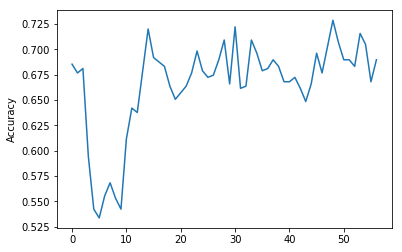

In [122]:
plt.plot(scores)
plt.ylabel('Accuracy')
plt.show()

In [131]:
scores.index(max(scores))+1

49

In [129]:
print(scores[56])

0.689804772234
